In [8]:
import PIL.Image
!pip install jupyter_bbox_widget
!pip install ultralytics
!pip install cv2
!pip install openvino
!pip install timm

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [13]:
import os
import random
from ultralytics import YOLO
from jupyter_bbox_widget import BBoxWidget
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [19]:
import torch
directory = r'C:\Users\tuana\Documents\frames'
model = torch.hub.load('ultralytics/yolov9', 'yolov5e')
device = "cuda:0"

HTTPError: HTTP Error 403: rate limit exceeded

In [7]:
image_files = os.listdir(directory)
random_image = random.sample(image_files, 20)
images = []
for i in random_image:
    images.append(os.path.join(directory, i))

In [8]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [11]:
import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [12]:
random_image

NameError: name 'random_image' is not defined

In [13]:
widget = BBoxWidget()
widget.image = encode_image(images[0])
widget

NameError: name 'BBoxWidget' is not defined

In [15]:
widget.bboxes

[{'x': 605, 'y': 161, 'width': 1296, 'height': 537, 'label': ''}]

In [10]:
rois = []
roi = {}
for bbox in widget.bboxes:
    roi = {'x1': bbox['x'], 'y1': bbox['y'], 'x2': bbox['width']+ bbox['x'], 'y2': bbox['height'] + bbox['y']}
    rois.append(roi)
roi

NameError: name 'widget' is not defined

In [17]:
import cv2
image = images[0]
img = cv2.imread(image)
roi_img = img[roi['y1']:roi['y2'], roi['x1']:roi['x2']]

In [18]:
roi_img.shape

(537, 1296, 3)

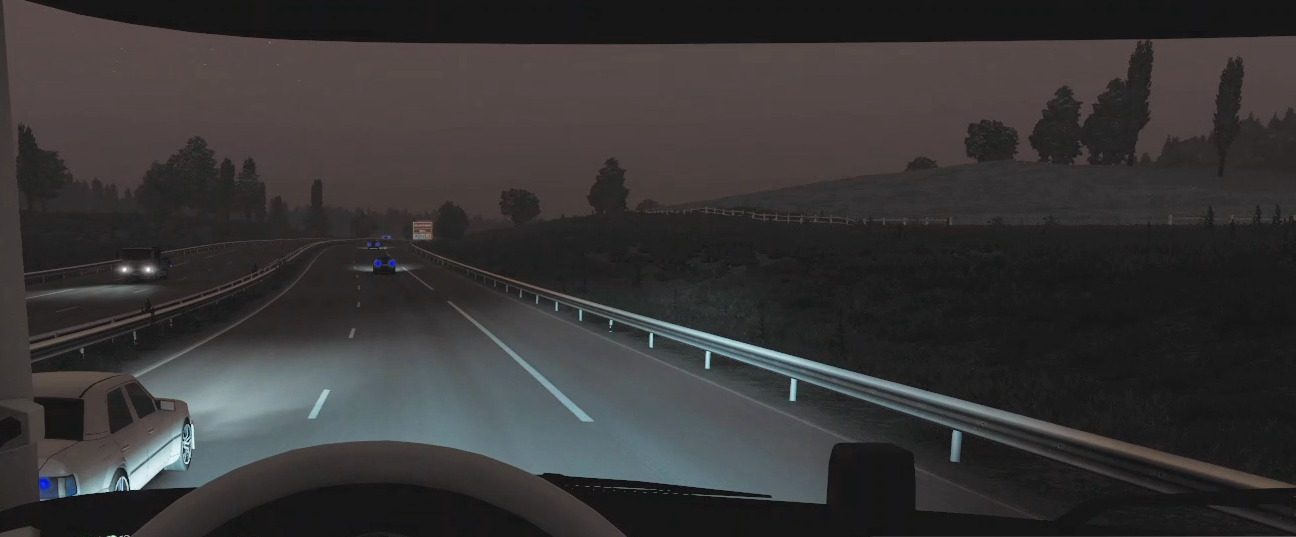

In [19]:
from PIL import Image
from IPython.display import display
output = Image.fromarray(roi_img)
display(output)

In [20]:
type(output)

PIL.Image.Image

In [21]:
result = model.predict(output, save = True, device = device)


0: 288x640 3 cars, 114.6ms
Speed: 2.0ms preprocess, 114.6ms inference, 107.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict8


In [4]:
model = YOLO("yolov9m.pt")
model.export(format = "engine", device = "cuda:0")

FileNotFoundError: [Errno 2] No such file or directory: 'yolov9c.pt'

In [23]:
from ultralytics import YOLO
tensorrt_model = YOLO("yolov8m.engine")
coi = [0, 1, 2, 3, 5, 6, 7, 8, 9, 11]
result = tensorrt_model(output, device = "cuda:0", task = "detect", classes = coi, save_crop = True, show_conf = True)

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Loading yolov8m.engine for TensorRT inference...

0: 640x640 3 cars, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9


In [7]:
import torch
import cv2
model_type = "DPT_Hybrid"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

Using cache found in C:\Users\tuana/.cache\torch\hub\intel-isl_MiDaS_master


DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): HybridEmbed(
        (backbone): ResNetV2(
          (stem): Sequential(
            (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
            (norm): GroupNormAct(
              32, 64, eps=1e-05, affine=True
              (drop): Identity()
              (act): ReLU(inplace=True)
            )
            (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
          )
          (stages): Sequential(
            (0): ResNetStage(
              (blocks): Sequential(
                (0): Bottleneck(
                  (downsample): DownsampleConv(
                    (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (norm): GroupNormAct(
                      32, 256, eps=1e-05, affine=True
                      (drop): Identity()
                      (act): Identit

In [8]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\tuana/.cache\torch\hub\intel-isl_MiDaS_master


In [9]:
roi_img = cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB)
input_batch = transform(roi_img).to(device)

NameError: name 'roi_img' is not defined

In [31]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

In [3]:
from IPython.display import display
output = Image.fromarray(output)
display(output)

NameError: name 'Image' is not defined

In [2]:
import matplotlib.pyplot as plt

# Display the output of the MiDaS model with colors
plt.imshow(output, cmap='jet')
plt.show()

NameError: name 'output' is not defined